## Insider Selling Scraper

This script attempts to understand a little more clearly the relationship between insider selling, individual sellers and their relationships to the companies sold and why.

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

base_url = 'https://www.finviz.com/insidertrading.ashx?tc=2'
html = requests.get(base_url)
soup = BeautifulSoup(html.content, "html.parser")
table = soup.find('table', attrs={'class': 'body-table'})
rows = table.findAll('tr', attrs={'class':['insider-sale-row-1', 'insider-sale-row-2']})
tick =[]
own = []
rel = []
dt = []
trans = []
c = []
sh = []
val = []
sh_t = []
sec = []
df = pd.DataFrame()


for row in rows:
        cells = row.findAll('td')
        ticker = cells[0].get_text()
        tick.append(ticker)
df['ticker'] = tick  
for row in rows:
        cells = row.findAll('td')
        owner = cells[1].get_text()
        own.append(owner)
df['owner'] = own
for row in rows:
    cells = row.findAll('td')
    relationship = cells[2].get_text()
    rel.append(relationship)
df['relationship'] = rel
for row in rows:
        cells = row.findAll('td')
        date = cells[3].get_text( )
        dt.append(date)
df['date'] = dt
for row in rows:
        cells = row.findAll('td')
        transaction = cells[4].get_text()
        trans.append(transaction)
df['transaction'] = trans
for row in rows:
        cells = row.findAll('td')
        cost = cells[5].get_text()
        c.append(float(cost))
df['cost'] = c
for row in rows:
        cells = row.findAll('td')        
        shares = cells[6].get_text()
        sh.append(shares)
df['shares'] = sh
for row in rows:
        cells = row.findAll('td')        
        value = cells[7].get_text()
        val.append(value)
df['value'] = val
for row in rows:
        cells = row.findAll('td')        
        shares_total = cells[8].get_text()
        sh_t.append(shares_total)
df['shares_total'] = sh_t
for row in rows:
        cells = row.findAll('td')
        sec_form4 = cells[9].get_text()
        sec.append(sec_form4)
df['sec_form4'] = sec


### Print of first 5 rows

In [3]:
df.head()

,ticker,owner,relationship,date,transaction,cost,shares,value,shares_total,sec_form4
0,WRK,LUKE JOHN A JR,Director,Feb 06,Sale,64.16,"50,000","3,207,825","497,443",Feb 07 11:20 AM
1,WRK,LUKE JOHN A JR,Director,Feb 05,Sale,66.13,"74,621","4,934,485","497,443",Feb 07 11:20 AM
2,NVR,Grier Eddie Arthur,Director,Feb 06,Sale,2968.07,400,"1,187,226",133,Feb 07 10:59 AM
3,FFIC,Obrien Donna M,Director,Feb 05,Sale,27.73,"6,000","166,380","49,725",Feb 07 10:18 AM
4,ACN,CLARK RICHARD P,Chief Accounting Officer,Feb 05,Sale,157.87,"1,853","292,533","4,886",Feb 07 09:08 AM


### List of Owners by selling size, value, and ticker

In [27]:
df.groupby(['owner','shares','value','ticker']).sum()

cost
owner                    shares  value      ticker        
ABG Management Ltd       70,721  566,037    SRNE      8.00
Altman Roger C           21,888  2,227,352  EVR     101.76
                         26,125  2,660,074  EVR     101.82
                         35,276  3,418,324  EVR      96.90
                         41,729  4,171,223  EVR      99.96
                         42,836  4,282,005  EVR      99.96
                         57,146  5,487,815  EVR      96.03
Alton Gregg H            25,000  2,087,860  GILD     83.51
Anderson Aaron           9,367   729,132    PYPL     77.84
BABB RALPH W JR          65,300  6,374,194  CMA      97.61
BARR WILLIAM P           4,019   390,647    TWX      97.20
BARTON RICHARD N         350     86,737     NFLX    247.82
                                 91,669     NFLX    261.91
BEGLEY CHARLENE T        4,017   326,863    NDAQ     81.37
BOWMAN A BLAINE          3,000   692,448    ILMN    230.82
BROWNLIE WILLIAM R       12,713  640,258    TTEK     50.36
BURTON JOSEPH B          2,700   157,043    PLT      58.16
                         3,860   222,643    PLT      57.68
                         3,900   225,853    PLT      57.91
                         423     24,831     PLT      58.70
                         5,117   294,277    PLT      57.51
Belousova Maria          2,308   165,876    GRUB     71.87
                         530     36,008     GRUB     67.94
Benioff Marc             5,000   539,093    CRM     107.82
                                 549,884    CRM     109.98
                                 557,240    CRM     111.45
Bowser Scott L           3,500   85,250     MOD      24.36
Bryant Vernon Wilson Jr. 5,000   281,937    SFNC     56.39
                                 299,650    SFNC     59.93
Buckingham Lisa          9,462   799,671    LNC      84.51
...                                                    ...
SCHNECK JAMES J          47,200  2,775,110  WABC     58.79
SEIF MARGARET K          7,000   619,500    ADI      88.50
SELLERS ROBERT W.A.      12,020  1,574,935  EW      131.03
SHERMAN WILLIAM D        197     9,878      CRUS     50.14
STRIANESE MICHAEL T      39,515  8,229,553  LLL     208.26
Sammann Derek            2,400   387,972    CME     161.66
Sands Anita M            1,636   246,234    NOW     150.51
Sciammas Maurice         4,057   461,906    MPWR    113.85
Shenoy Navin             1,311   61,774     INTC     47.12
Smith Gregory Stephen    7,431   330,763    TER      44.51
Sonntag Martin           1,663   224,697    INGR    135.12
                         14,939  2,016,765  INGR    135.00
Steiner Jonathan P       1,960   89,997     LKFN     45.92
Stier Eric               401     2,057      GNMK      5.13
Sweeney James E          1,082   37,621     SFBC     34.77
TEEGARDEN ERIC M         5,177   230,337    HI       44.49
TOCIO MARY ANN           3,600   335,358    BFAM     93.16
Vale Michael G.          6,243   1,541,999  MMM     247.00
Villavarayan Chris       18,000  515,009    MTOR     28.61
WELSH BILL               2,200   198,000    LNN      90.00
                         800     72,160     LNN      90.20
WENTZ MYRON W            2,753   204,390    USNA     74.24
                         27,126  1,925,941  USNA     71.00
                         8,344   603,124    USNA     72.28
WHITMAN MARGARET C       242,165 3,698,029  HPE      15.27
WU PETER                 33,045  1,465,876  CATY     44.36
Williams Jennifer Anne   365     1,872      GNMK      5.13
Wright Emory             45,780  11,906,664 ALGN    260.08
Xiao Deming              4,382   498,909    MPWR    113.85
Zern John                14,747  2,167,809  AON     147.00

[200 rows x 1 columns]

### Dataframe with closer look at relationship of insider to company (by ticker)
The below dataframe makes it easier to see the group of sellers selling stocks by company. While one seller might not be cause for suspicion, 2,3, 4 or more sellers per ticker would warrant a closer look becuase of insider selling based on insider information. Next step would be to plot the price of the given ticker and overlay the point of the insider sells

In [5]:
df.groupby(['ticker','owner','relationship', 'date']).mean()

cost
ticker owner                          relationship                   date          
ABTX   MANN PAUL MICHAEL              Director                       Feb 01   40.08
                                                                     Feb 02   40.19
ACN    CLARK RICHARD P                Chief Accounting Officer       Feb 05  157.87
ADI    SEIF MARGARET K                SVP, CLO & Secretary           Feb 05   88.50
ALGN   Wright Emory                   VP, Operations                 Feb 02  260.08
AME    EGINTON WILLIAM D              SENIOR VP-CORP. DEVELOPMENT    Feb 05   77.00
AON    O'Connor Michael J             Chief Executive Officer, ARS   Feb 02  145.00
       Zern John                      CEO, Aon Global Health         Feb 02  147.00
AP     Louis Berkman Investment CO    10% Owner                      Feb 05   13.05
ASB    FLYNN PHILIP B                 President & CEO                Feb 05   25.08
ATHN   Bush Jonathan                  CEO and President              Feb 01  122.69
       Hull Brandon H                 Director                       Feb 02  133.00
ATKR   CD&R; Allied Holdings, L.P.    10% Owner                      Feb 02   21.77
ATRO   GUNDERMANN PETER J             PRESIDENT/CEO                  Feb 02   43.48
       PEABODY MARK                   VP Astronics Advanced Electron Feb 02   43.48
AVNW   Chang Eric                     VP, Corporate Controller & PAO Feb 06   15.44
AXTA   Lannon Sean M.                 VP Corp Fin & Controller, PAO  Feb 05   30.77
BANR   PURCELL CYNTHIA D              Executive VP, Banner Bank      Feb 05   54.67
BFAM   Burke Mary Lou                 COO North America Center Ops   Feb 05   96.33
       TOCIO MARY ANN                 Director                       Feb 06   93.16
BMRN   Davis George Eric              EVP, General Counsel           Feb 01   90.66
CAL    Freidman Daniel R              Div Pres, Whls Prod & Source   Feb 05   28.45
CATY   WU PETER                       Vice Chairman                  Feb 02   44.36
CHFC   KLAESER DENNIS L               Executive V.P., C.F.O.         Feb 02   58.48
CMA    BABB RALPH W JR                Chairman & CEO                 Feb 02   97.61
       Guilfoile Peter William        Executive Vice President       Feb 02   97.00
CME    Kometer Kevin                  Sr MD Chief Information Office Feb 02  162.02
       Sammann Derek                  Sr MD Gl Hd Commodity & Option Feb 02  161.66
CRCM   Krupinski David                Chief Technology Officer       Feb 01   18.59
       Musi Diane                     General Counsel and Secretary  Feb 02   18.01
...                                                                             ...
SLM    Lutz Laurent Charles           EVP, GC and Secretary          Feb 05   11.40
                                                                     Feb 06   11.02
SMG    HAGEDORN KATHERINE LITTLEFIELD Director                       Feb 05   89.50
SRNE   ABG Management Ltd             10% Owner                      Feb 05    8.00
SYK    McLean Graham A                President, Asia-Pacific        Feb 05  160.53
TDY    DAHLBERG KENNETH C             Director                       Feb 05  182.44
TER    JAGIELA MARK E                 President and CEO              Feb 02   44.96
       Smith Gregory Stephen          President, Semiconductor Test  Feb 05   44.51
TMO    Herrema Gregory J.             Senior Vice President          Feb 02  219.70
TTEK   BROWNLIE WILLIAM R             SVP, CHIEF ENGINEER            Feb 05   50.36
       LEWIS J CHRISTOPHER            Director                       Feb 05   49.91
       MCDONALD KEVIN P               SVP, CORPORATE HUMAN RESOURCES Feb 05   50.44
TWTR   Kaiden Robert                  Chief Accounting Officer       Feb 01   26.17
TWX    BARR WILLIAM P                 Director                       Feb 05   97.20
USNA   Gull Global Ltd                10% Owner                      Feb 02   74.24
                                               

### Relationships of Insider Sellers

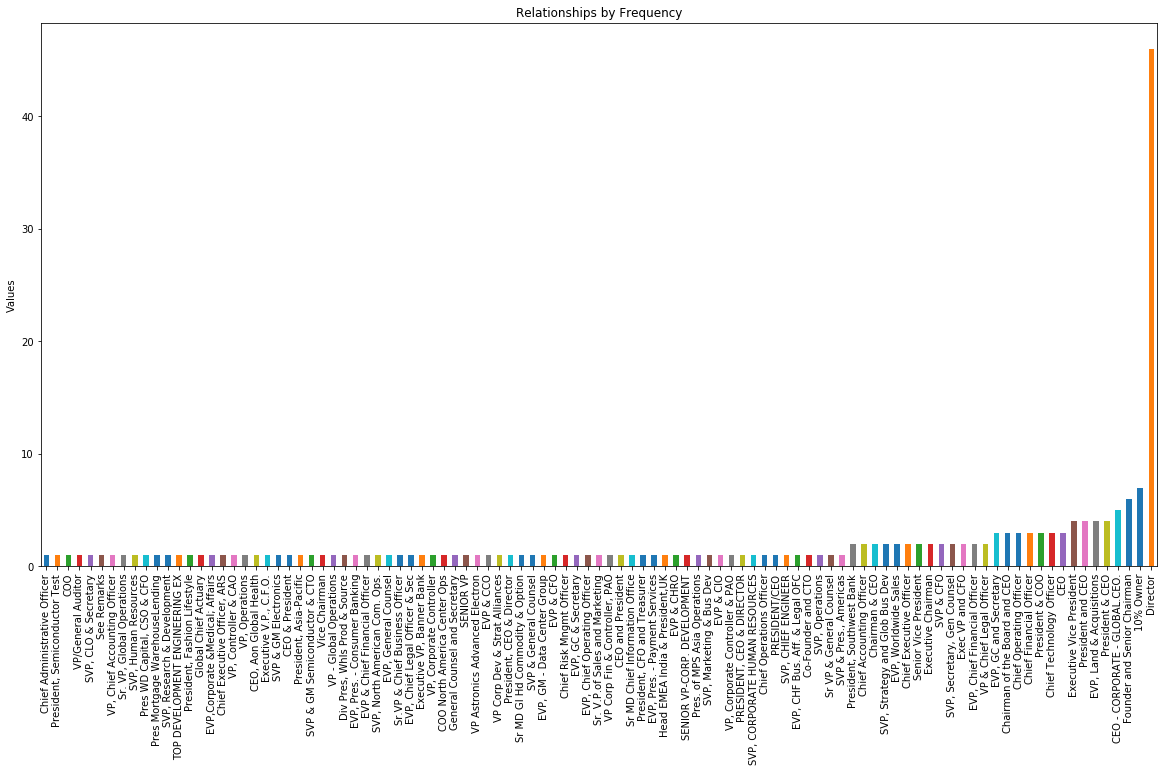

In [28]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
df.relationship.value_counts().sort_values().plot(kind = "bar");
plt.ylabel('Values');
plt.title('Relationships by Frequency');

### Graph of Most Actively Sold Insider Traded Symbols

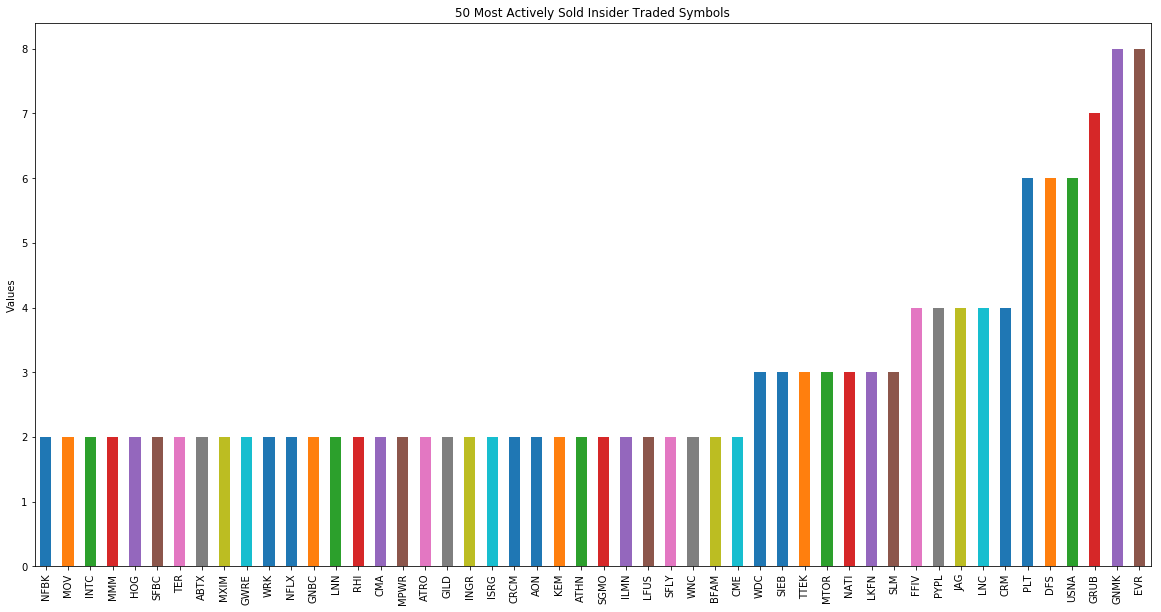

In [25]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
df.ticker.value_counts().head(50).sort_values().plot(kind = "bar");
plt.ylabel('Values');
plt.title('50 Most Actively Sold Insider Traded Symbols');


### Most Active Insider Sellers by Number of Transactions

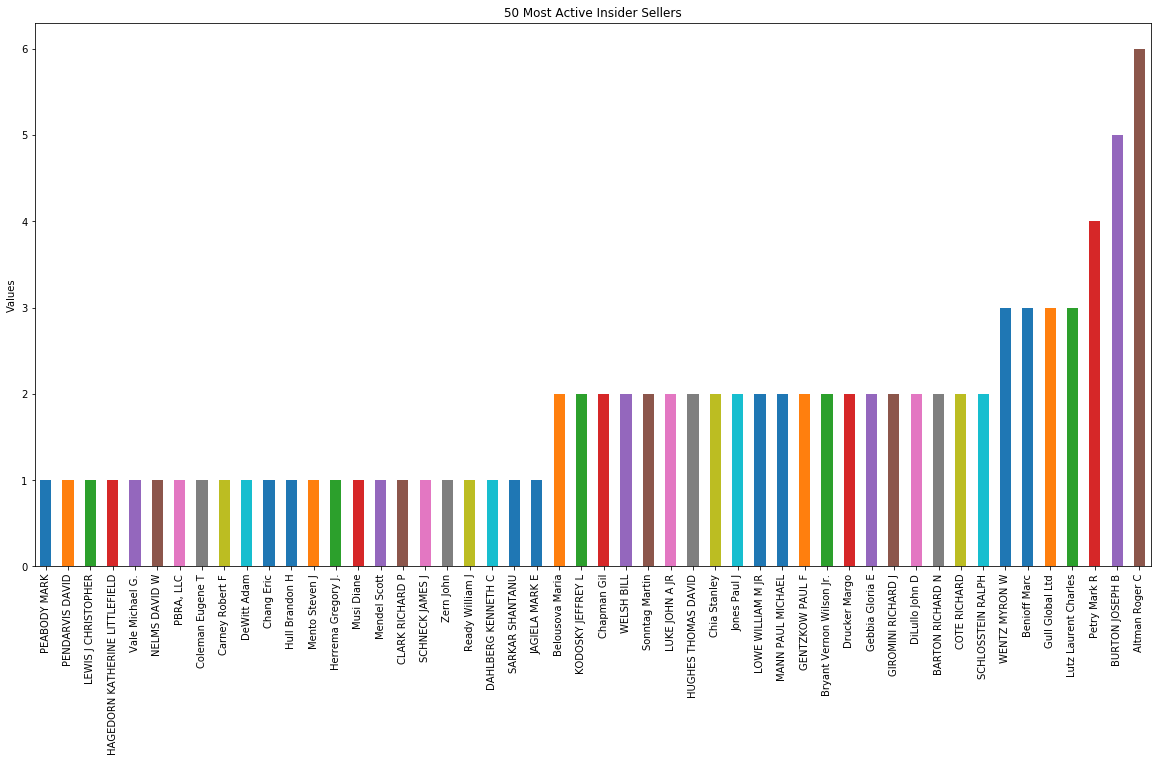

In [29]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
df.owner.value_counts().head(50).sort_values().plot(kind = "bar")
plt.ylabel('Values');
plt.title('50 Most Active Insider Sellers');